## Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels as sm

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('Solarize_Light2')
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
#import os
#os.chdir('D:\DataScienceBC\Datensatz')

In [4]:
df = pd.read_parquet("Datensatz/housing_clean.pqt")

In [5]:
df.dtypes.sort_values()

date             datetime64[ns]
yr_renovated              int32
bathrooms                 int32
sqft_basement             int32
floors                    int32
yr_built                  int64
sqft_above                int64
sqft_living15             int64
sqft_lot15                int64
sqft_lot                  int64
sqft_living               int64
bedrooms                  int64
price                   float64
lat                     float64
long                    float64
waterfront               object
grade                    object
zipcode                  object
view                     object
condition                object
dtype: object

### Houses sold in and around Seattle

In [6]:
import folium

In [7]:
# Bin Prices for comparison on map of low, middle and high priced Housing
df.price.describe()

count     18749.000
mean     541622.282
std      371649.215
min       78000.000
25%      321500.000
50%      450000.000
75%      643500.000
max     7700000.000
Name: price, dtype: float64

In [8]:
df_range = df[['lat', 'long', 'price']]
df_range['segment'] = pd.cut(df_range.price, [0,321500, 600000, 7700000], labels = ['low', 'middle', 'high'])

In [9]:
df_rang = df_range[:500]

In [10]:
m = folium.Map(location = [47.721,-122.319], tiles='CartoDB dark_matter', zoom_start=8)

for index, row in df_rang.iterrows():
    if row['segment'] == 'low':
        folium.Circle(location=(row['lat'], row['long']), radius=100, color = 'green').add_to(m)
    elif row['segment'] == 'middle':
        folium.Circle(location=(row['lat'], row['long']), radius=100, color = 'blue').add_to(m)
    else:
        folium.Circle(location=(row['lat'], row['long']), radius=100, color = 'purple').add_to(m)
    
    
m

### Visualization of Categorical Features

- Zipcode
- Grade
- Condition
- Waterfront
- View


##### The 30 most common Zipcodes

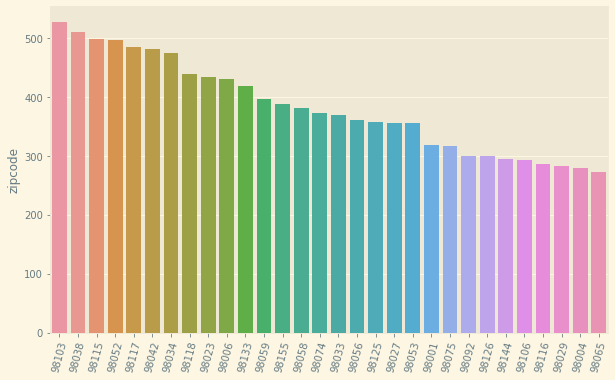

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.zipcode.value_counts().head(30).index, y=df.zipcode.value_counts().head(30))
plt.xticks(rotation='75');

##### Distributions by Zip Code

In [12]:
zip_all = df.groupby('zipcode')['price'].mean().sort_values()
zip_high = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)
zip_low = df.groupby('zipcode')['price'].mean().sort_values().head(10)

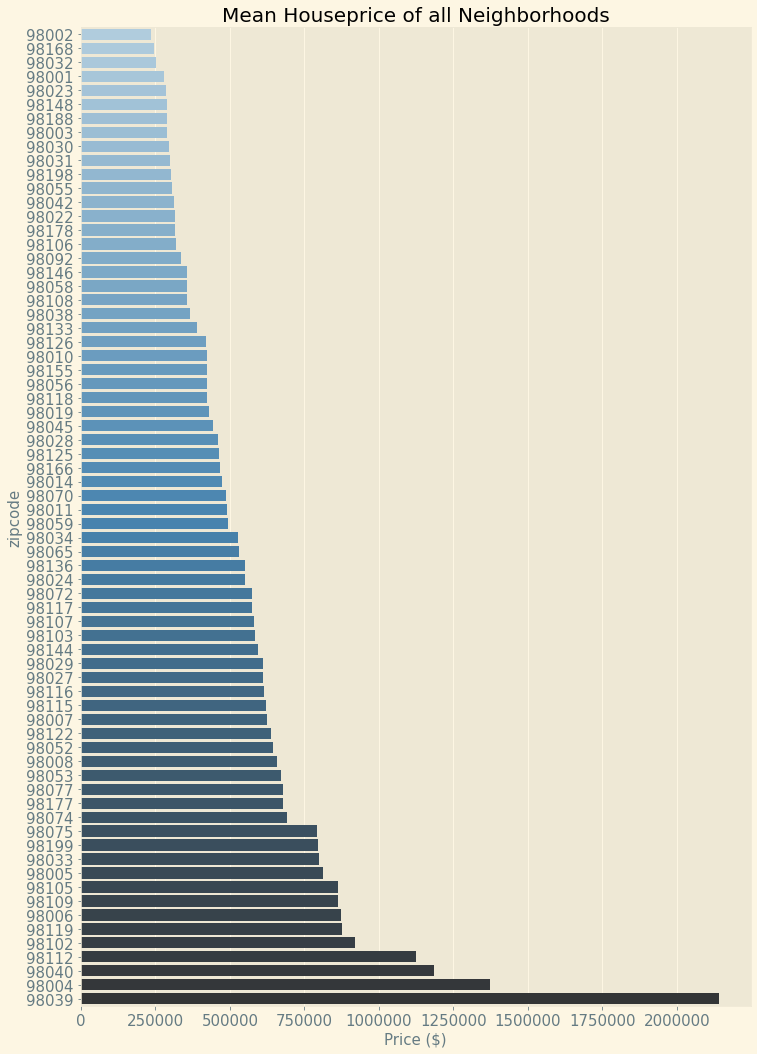

In [13]:
# Style
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12,18))
plt.title("Mean Houseprice of all Neighborhoods", fontsize = 20)
plt.xlabel('Price ($)', fontsize = 15);
plt.ylabel('Zipcode', fontsize = 15); 
plt.ticklabel_format(style='plain', axis='x')

# Plot
sns.barplot(y=zip_all.index, x=zip_all.values, palette="Blues_d", orient='h');

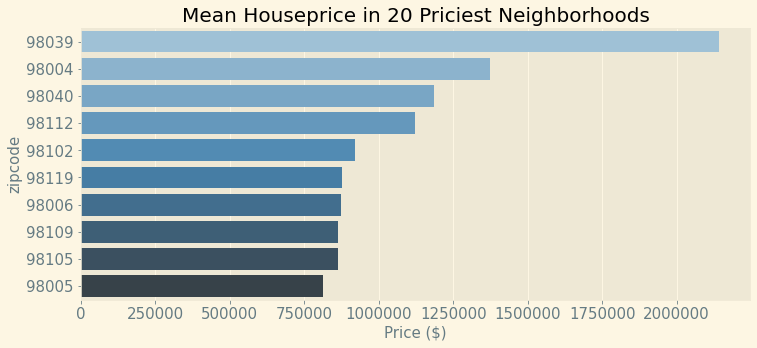

In [14]:
# Style
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12,5))
plt.title("Mean Houseprice in 20 Priciest Neighborhoods", fontsize = 20)
plt.xlabel('Price ($)', fontsize = 15);
plt.ylabel('Zipcode', fontsize = 15); 
plt.ticklabel_format(style='plain', axis='x')

# Plot
sns.barplot(y=zip_high.index, x=zip_high.values, palette="Blues_d", orient='h');

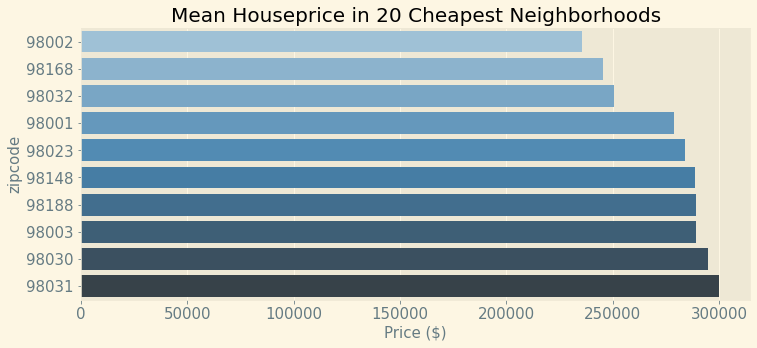

In [15]:
# Style
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12,5))
plt.title("Mean Houseprice in 20 Cheapest Neighborhoods", fontsize = 20)
plt.xlabel('Price ($)', fontsize = 15);
plt.ylabel('Zipcode', fontsize = 15); 
plt.ticklabel_format(style='plain', axis='x')

# Plot
sns.barplot(y=zip_low.index, x=zip_low.values, palette="Blues_d", orient='h');

##### Zip Codes with high turnover

In [16]:
# House Sales by zipcode for Areas with high turnover
df.zipcode.value_counts()

98103    527
98038    510
98115    498
98052    496
98117    484
        ... 
98102     87
98010     85
98024     72
98148     50
98039     44
Name: zipcode, Length: 70, dtype: int64

In [17]:
mep = folium.Map(location = [47.68,-122.35], zoom_start=10)

for index, row in df.iterrows():
    if row['zipcode'] == '98103':
        folium.Circle(location=(row['lat'], row['long']), radius=100, color = 'yellow').add_to(mep)
    elif row['zipcode'] == '98117':
        folium.Circle(location=(row['lat'], row['long']), radius=100, color = 'blue').add_to(mep)
    elif row['zipcode'] == '98039':
        folium.Circle(location=(row['lat'], row['long']), radius=100, color = 'green').add_to(mep)
mep

##### Grade of workmanship

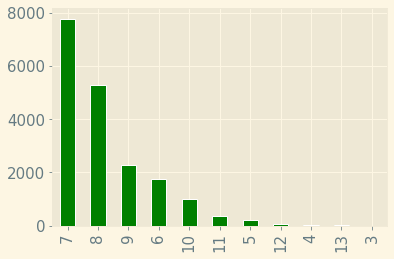

In [18]:
# Distribution of Grade
df.grade.value_counts().plot(kind='bar', color='green', edgecolor = 'white');

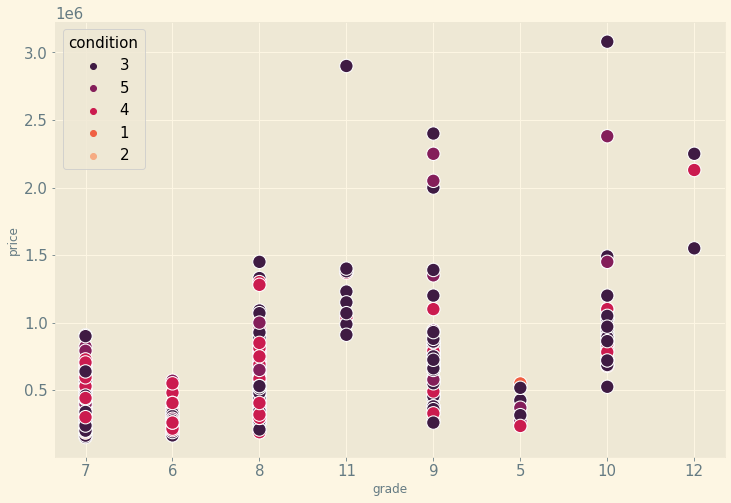

In [19]:
# Grade and Price and condition
plt.figure(figsize=(12,8))
sns.scatterplot(x='grade', y='price',  s=180, palette='rocket', hue = 'condition', data=df[:500] );

##### Condition
The Conditions range from 1 to 5 with condition 3 being the most common of the five. 

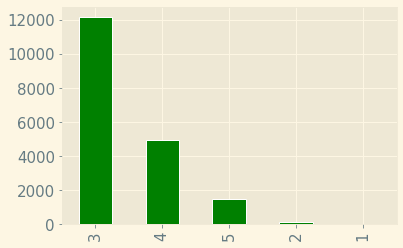

In [20]:
# Distribution of Condition
df.condition.value_counts().plot(kind='bar', color='green', edgecolor='white');

In [21]:
# Condition and Age of House (in 2015)
df['age'] = 2015 - df.yr_built

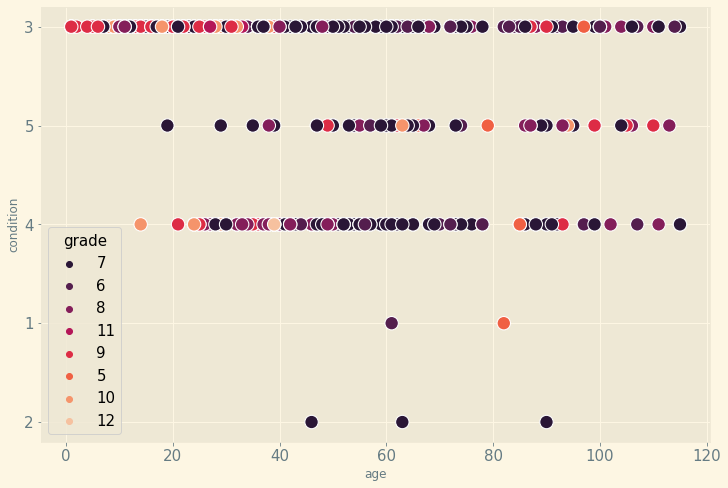

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age', y='condition',  s=180, palette='rocket', hue = 'grade', data=df[:500] );

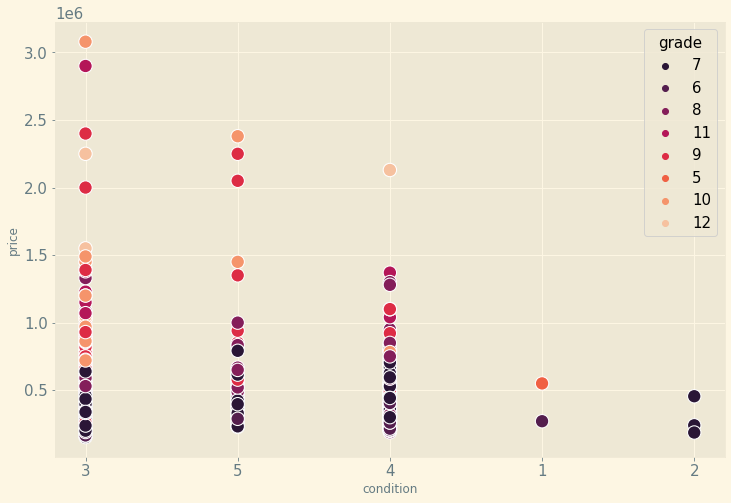

In [23]:
# Condition and Price
plt.figure(figsize=(12,8))
sns.scatterplot(x='condition', y='price',  s=180, palette='rocket', hue = 'grade', data=df[:500] );

##### Waterfront

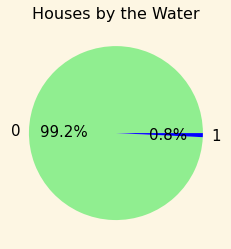

In [24]:
# Distribution of Waterfront
labels = df.waterfront.unique().tolist();
sizes = df.waterfront.value_counts().tolist();
colors = ['lightgreen', 'blue'];
plt.pie(sizes, labels=labels, colors=colors, startangle=0, autopct='%1.1f%%');
plt.title('Houses by the Water');

In [25]:
# Waterfront and Price
df.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,18608.000,532801.554,345468.684,78000.000,320000.000,450000.000,638500.000,7700000.000
1,141.000,1705708.156,1122168.431,285000.000,820000.000,1580000.000,2300000.000,7060000.000


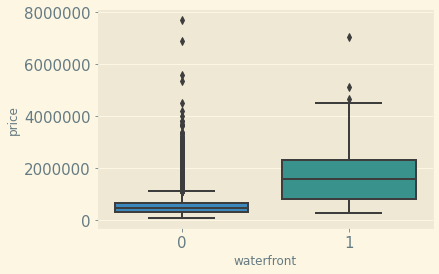

In [26]:
ax = sns.boxplot(x="waterfront", y="price", data=df)
plt.ticklabel_format(style='plain', axis='y')

##### View

In [27]:
df.view.unique()

array(['0', '3', '4', '2', '1'], dtype=object)

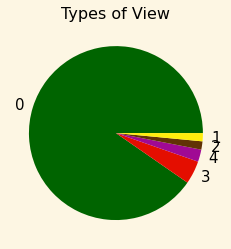

In [28]:
# Distribution of view 

labels = df.view.unique().tolist();
sizes = df.view.value_counts().tolist();
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D'];
plt.pie(sizes, labels=labels, colors=colors, startangle=0);
plt.title('Types of View');


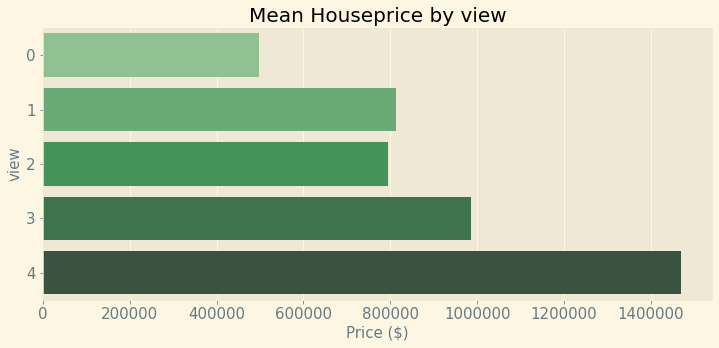

In [29]:
# View
view = df.groupby('view')['price'].mean()
# Style
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12,5))
plt.title("Mean Houseprice by view", fontsize = 20)
plt.xlabel('Price ($)', fontsize = 15);
plt.ylabel('View', fontsize = 15); 
plt.ticklabel_format(style='plain', axis='x')

# Plot
sns.barplot(y=view.index, x=view.values, palette="Greens_d");

#### Bedrooms and Bathrooms

In [30]:
df.bedrooms.value_counts()

3     8517
4     6008
2     2383
5     1399
6      217
1      170
7       33
8       11
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [31]:
# who has 33 bedrooms?
df[df.bedrooms == 33]
# looking at google maps, this seems to be an error!

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
index,,,,,,,,,,,,,,,,,,,,,
15856,2014-06-25,640000.000,33,1,1620,6000,1,0,0,5,...,1040,580,1947,0,98103,47.688,-122.331,1330,4700,68


In [32]:
df[df.bedrooms == 11]
# same here, looks like a typo

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
index,,,,,,,,,,,,,,,,,,,,,
8748,2014-08-21,520000.000,11,3,3000,4960,2,0,0,3,...,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,97


In [33]:
mi = folium.Map(location = [47.600,-122.331], zoom_start=11)
folium.Circle(location = (47.688,-122.331), popup = 'T900', radius = 50, color='blue', fill=True,
      fill_color='red').add_to(mi)
folium.Circle(location = (47.556,-122.363), popup = 'T900', radius = 50, color='blue', fill=True,
      fill_color='red').add_to(mi)
mi

### Visualization of the Continous Features

In [34]:
df.select_dtypes(include=['float64', 'int32', 'int64', 'datetime64[ns]']).columns
df.select_dtypes(exclude=['object']).columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

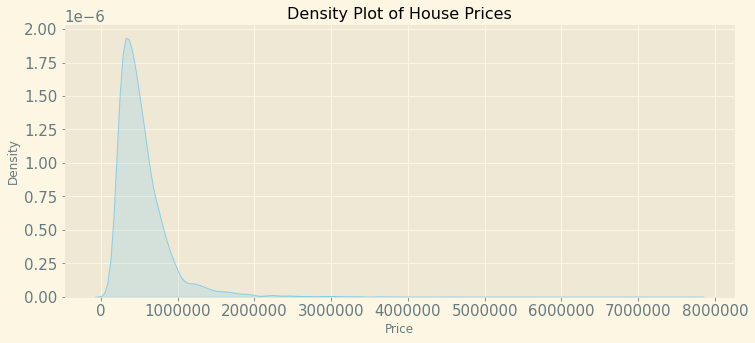

In [35]:
# Density Plot of House Prices
plt.figure(figsize=(12,5))
sns.kdeplot( df["price"] , color="skyblue", shade=True);
plt.xlabel('Price'), plt.ylabel('Density'), plt.title('Density Plot of House Prices');
plt.ticklabel_format(style='plain', axis='x')

In [51]:
df.price.max()

7700000.0

In [52]:
df[df.price == 7700000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
index,,,,,,,,,,,,,,,,,,,,,
7245,2014-10-13,7700000.000,6,8,12050,27600,2,0,3,4,...,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800,105


In [54]:
mm = folium.Map(location = [47.630,-122.323], zoom_start=15)
folium.Circle(location = (47.630,-122.323), popup = 'T900', radius = 50, color='blue', fill=True,
      fill_color='red').add_to(mm)
mm

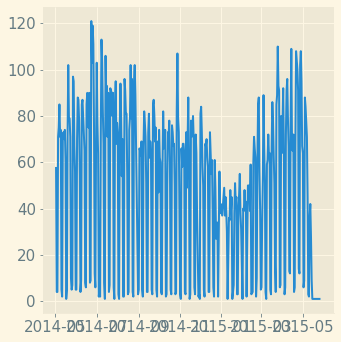

In [36]:
# Houses sold over time
hs = df.date.value_counts()
sns.relplot(x=hs.index, y=hs.values, kind="line")

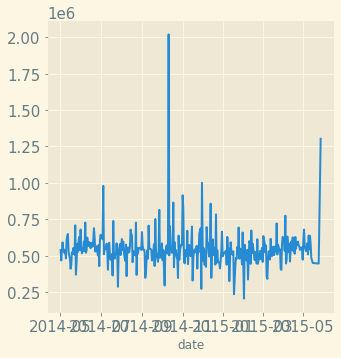

In [37]:
# House Prices over time
date_mean = df.groupby('date')['price'].mean()
sns.relplot(x=date_mean.index, y=date_mean.values, kind="line");

In [38]:
# this looks weird
sales_month = df.groupby([(df.date.dt.year), (df.date.dt.month)])['price'].mean()
sales_month

date  date
2014  5      548091.781
      6      559263.761
      7      544073.889
      8      536298.315
      9      527417.932
      10     542797.831
      11     524337.455
      12     528344.697
2015  1      527888.813
      2      509910.485
      3      547325.976
      4      565555.402
      5      558377.979
Name: price, dtype: float64

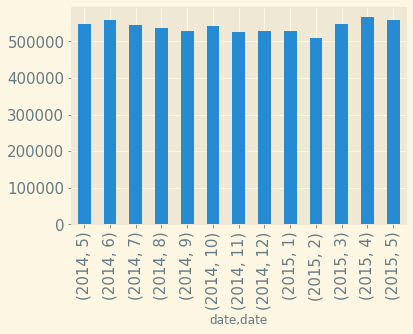

In [39]:
sales_month.plot(kind='bar');

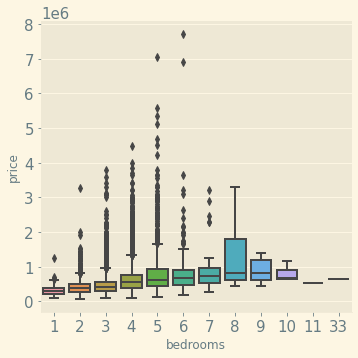

In [40]:
# bedrooms and bathrooms and floors
sns.catplot(x="bedrooms", y="price", kind="box", data=df);

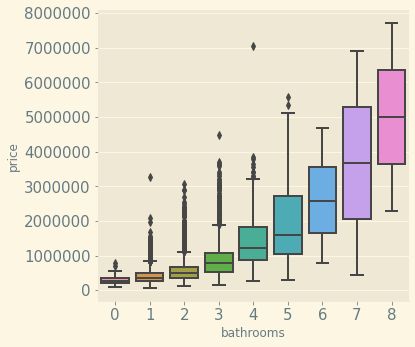

In [41]:
sns.catplot(x="bathrooms", y="price", kind="box", data=df);
plt.ticklabel_format(style='plain', axis='y')

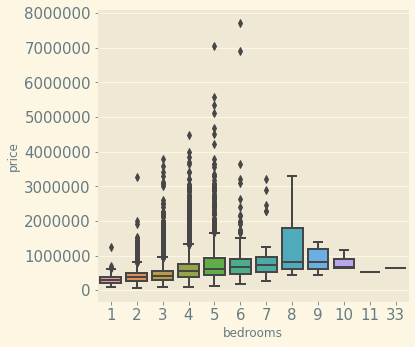

In [42]:
sns.catplot(x="bedrooms", y="price", kind="box", data=df);
plt.ticklabel_format(style='plain', axis='y')

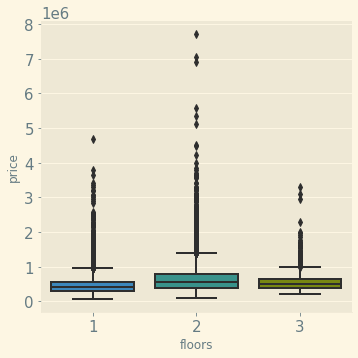

In [43]:
sns.catplot(x="floors", y="price", kind="box", data=df);

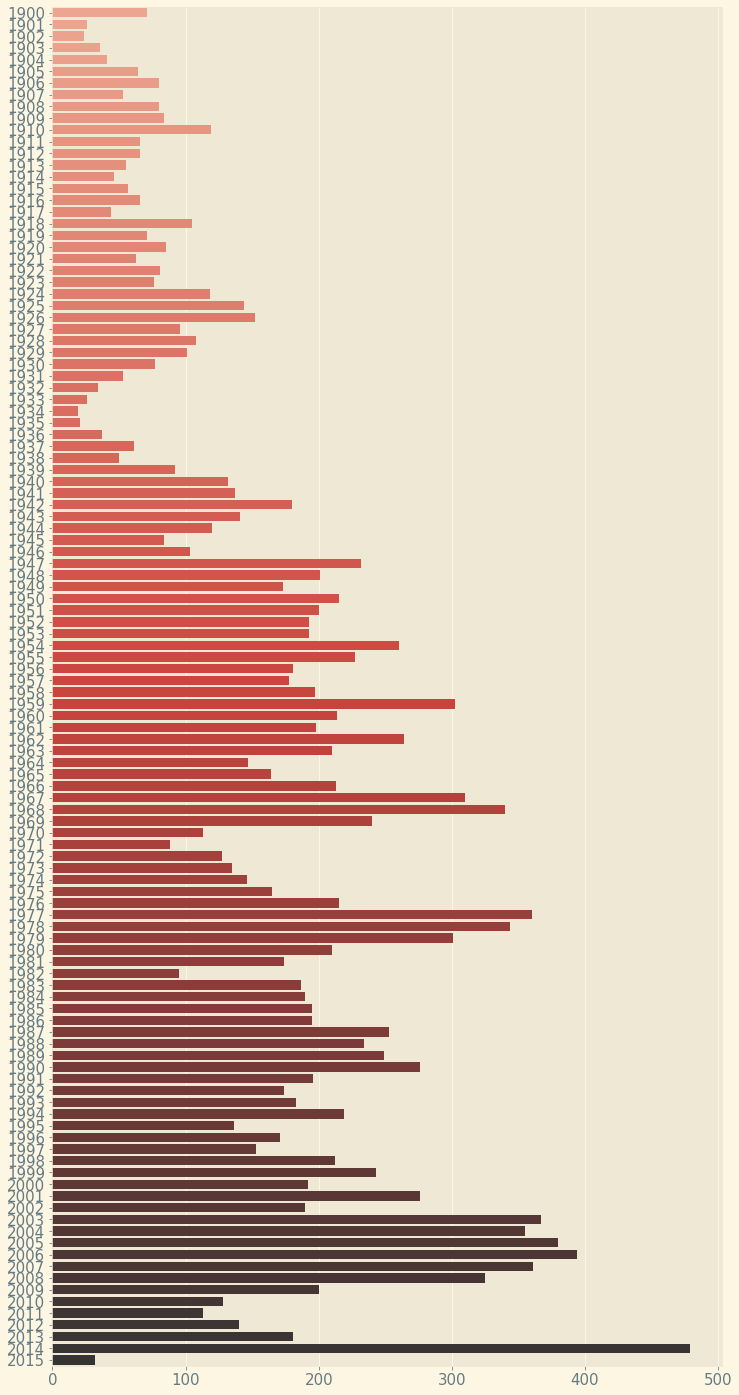

In [44]:
# hier könnte man historische Ereignisse drüberlegen (War, Black Friday, Housing Market Crash, etc)
# year built
plt.figure(figsize=(12,25))
yr_b = df.yr_built.value_counts().sort_index()
sns.barplot(y=yr_b.index, x=yr_b.values, palette="Reds_d", orient='h');

In [45]:
# year built and price
pyr_b = df.groupby('yr_built')['price'].mean()
pyr_b

yr_built
1900   569263.901
1901   559120.846
1902   653591.667
1903   469321.806
1904   592442.659
          ...    
2011   547402.124
2012   521401.607
2013   694393.166
2014   685619.827
2015   741559.250
Name: price, Length: 116, dtype: float64

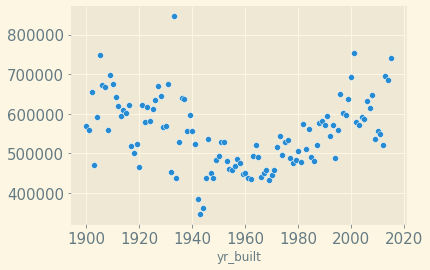

In [46]:
# After war houses not that fancy until 80s boom hits
sns.scatterplot(x=pyr_b.index, y=pyr_b.values);

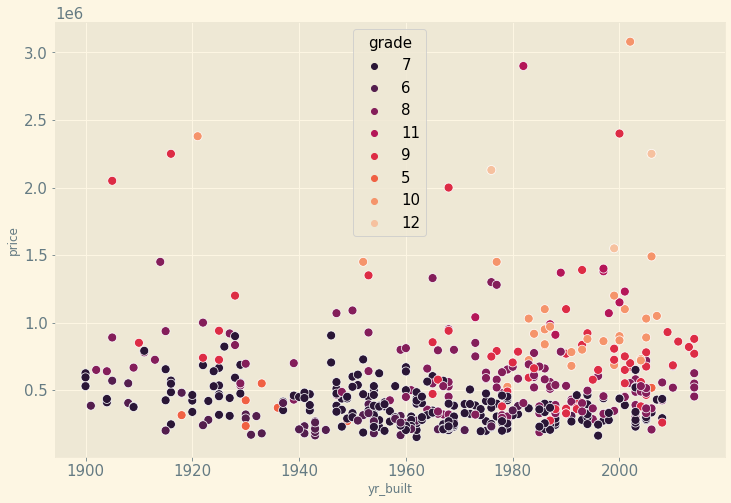

In [47]:
# no pattern emerges here
plt.figure(figsize=(12,8))
sns.scatterplot(x='yr_built', y='price', palette='rocket', hue = 'grade', s=80, data=df[:500] );

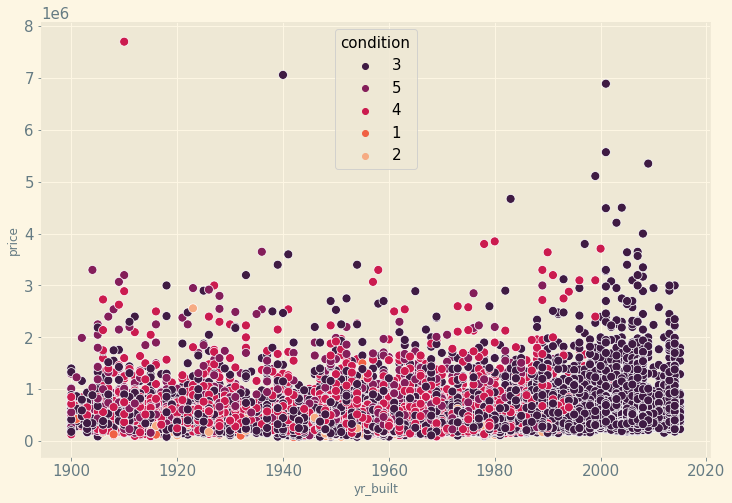

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='yr_built', y='price', palette='rocket', hue = 'condition', s=80, data=df);

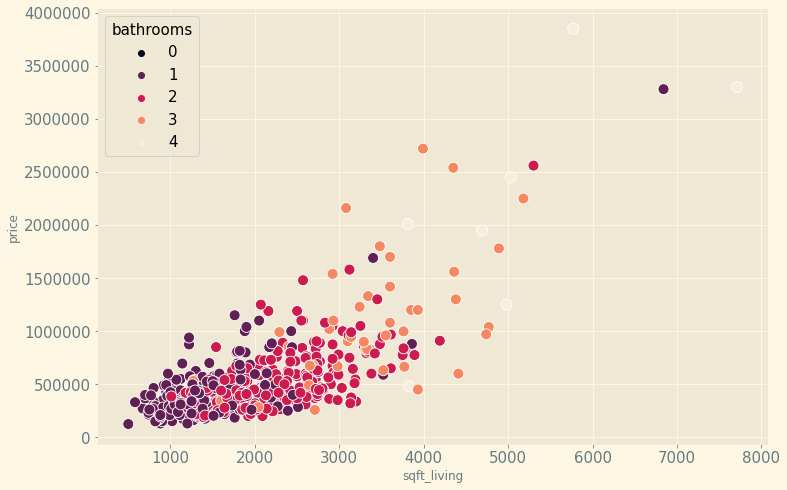

In [49]:
# Um nicht alle Datenpunkte abzubilden, nur einen Teil nehmen, dafür durchmischen oder stratifizieren

import numpy as np
data = df.reindex(np.random.permutation(df.index))
data = data.reset_index(drop=True)

plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_living', y='price', data = data[:500], hue = 'bathrooms', palette='rocket', s=120 );
plt.ticklabel_format(style='plain', axis='y')


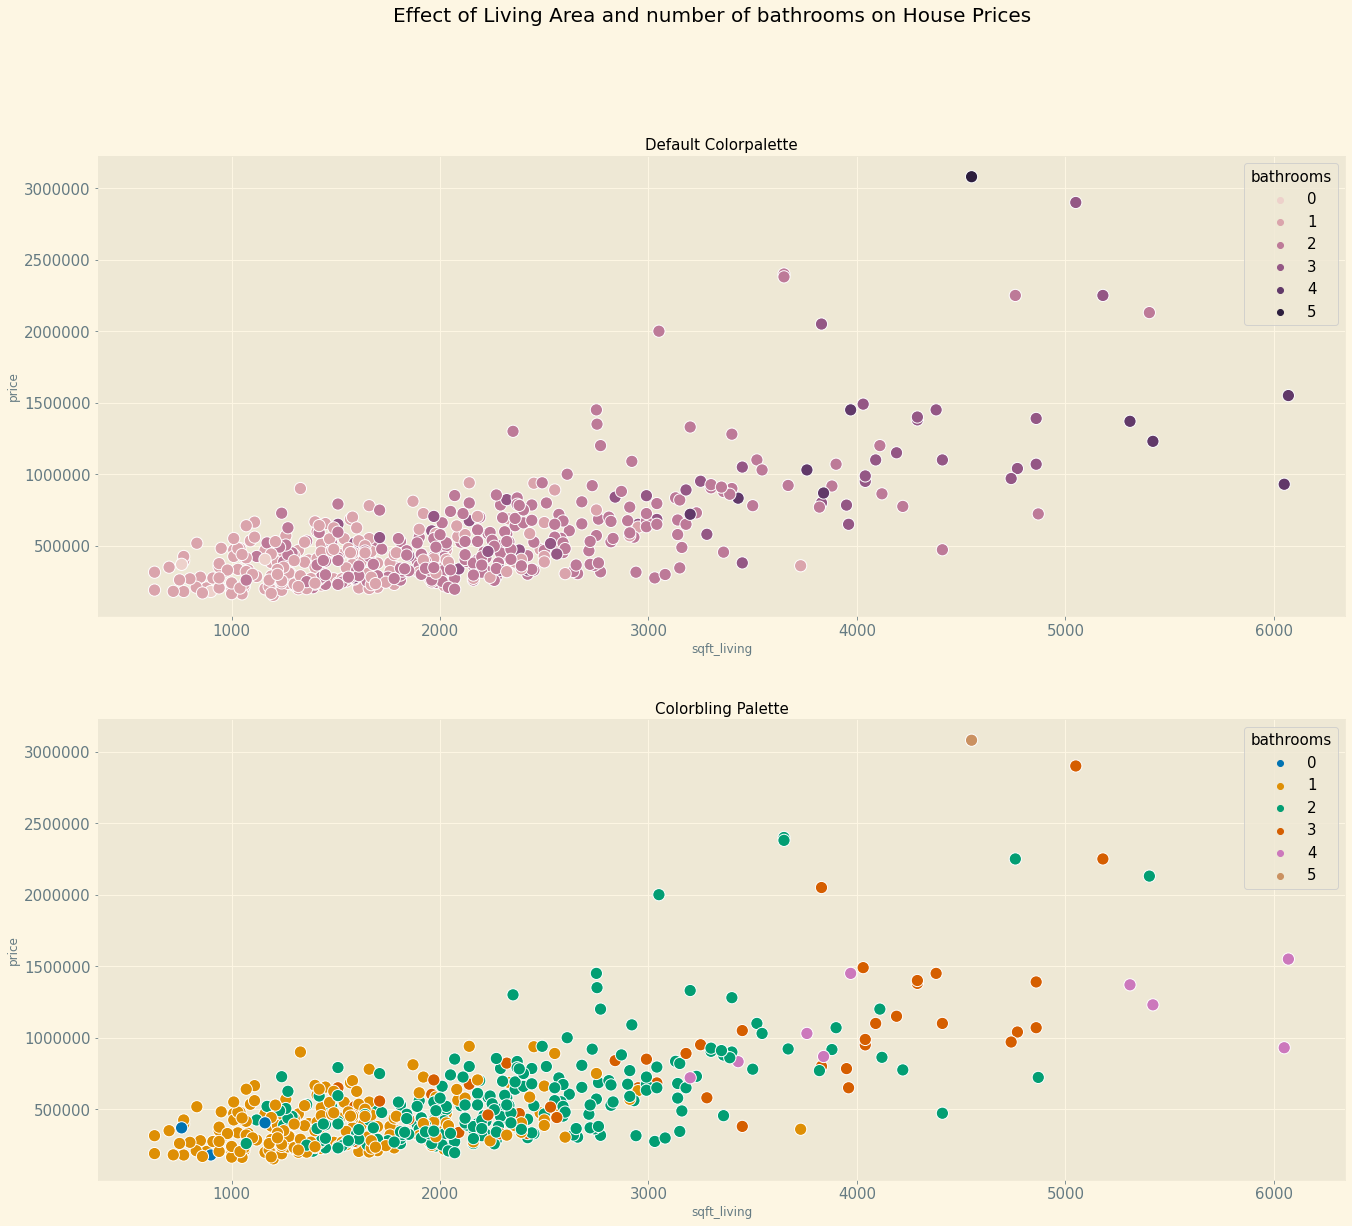

In [50]:
# Anordnung der Axes in der Figure
fig, axes = plt.subplots(2, 1, figsize=(20, 18))

# Titel der gesamten Figure
fig.suptitle('Effect of Living Area and number of bathrooms on House Prices', fontsize = 20)

# damit die Subplots ein wenig mehr Raum haben
fig.tight_layout(pad=5)

# Scatterplots
sns.scatterplot(ax=axes[0],x='sqft_living',y='price',data=df[:500], hue='bathrooms', s=150);
sns.scatterplot(ax=axes[1],x='sqft_living',y='price',data=df[:500], hue='bathrooms',palette='colorblind', s=150);

# Titel der Subplots
axes[0].set_title('Default Colorpalette', fontsize = 15);
axes[1].set_title('Colorbling Palette', fontsize = 15);

# Achsenformatierung
axes[0].ticklabel_format(style='plain', axis='y')
#axes[0].set_xticklabels(labels="sqft_living", rotation=90)

axes[1].ticklabel_format(style='plain', axis='y')
#axes[1].set_xticklabels(labels="sqft_living", rotation=90)


